### Importing dependecies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from utils import *

### Loading data and plotting

In [3]:
Bitcoin_data = pd.read_csv('resources/coin_Bitcoin.csv',index_col = ['Date'], parse_dates=True)
Ethereum_data = pd.read_csv('resources/coin_Ethereum.csv',index_col = ['Date'], parse_dates=True)

In [24]:
Bitcoin_data

SNo     Name Symbol          High           Low  \
Date                                                                    
2013-04-29 23:59:59     1  Bitcoin    BTC    147.488007    134.000000   
2013-04-30 23:59:59     2  Bitcoin    BTC    146.929993    134.050003   
2013-05-01 23:59:59     3  Bitcoin    BTC    139.889999    107.720001   
2013-05-02 23:59:59     4  Bitcoin    BTC    125.599998     92.281898   
2013-05-03 23:59:59     5  Bitcoin    BTC    108.127998     79.099998   
...                   ...      ...    ...           ...           ...   
2021-07-02 23:59:59  2987  Bitcoin    BTC  33939.588699  32770.680780   
2021-07-03 23:59:59  2988  Bitcoin    BTC  34909.259899  33402.696536   
2021-07-04 23:59:59  2989  Bitcoin    BTC  35937.567147  34396.477458   
2021-07-05 23:59:59  2990  Bitcoin    BTC  35284.344430  33213.661034   
2021-07-06 23:59:59  2991  Bitcoin    BTC  35038.536363  33599.916169   

                             Open         Close        Volume     Marketcap  
Date                                                                         
2013-04-29 23:59:59    134.444000    144.539993  0.000000e+00  1.603769e+09  
2013-04-30 23:59:59    144.000000    139.000000  0.000000e+00  1.542813e+09  
2013-05-01 23:59:59    139.000000    116.989998  0.000000e+00  1.298955e+09  
2013-05-02 23:59:59    116.379997    105.209999  0.000000e+00  1.168517e+09  
2013-05-03 23:59:59    106.250000     97.750000  0.000000e+00  1.085995e+09  
...                           ...           ...           ...           ...  
2021-07-02 23:59:59  33549.600177  33897.048590  3.872897e+10  6.354508e+11  
2021-07-03 23:59:59  33854.421362  34668.548402  2.438396e+10  6.499397e+11  
2021-07-04 23:59:59  34665.564866  35287.779766  2.492431e+10  6.615748e+11  
2021-07-05 23:59:59  35284.344430  33746.002456  2.672155e+10  6.326962e+11  
2021-07-06 23:59:59  33723.509655  34235.193451  2.650126e+10  6.418992e+11  

[2991 rows x 9 columns]

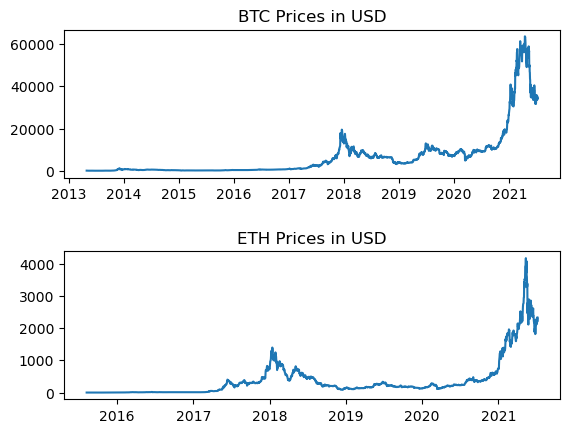

In [19]:
plt.subplot(2, 1, 1)
plt.plot(Bitcoin_data.index, Bitcoin_data['Close'])
plt.title('BTC Prices in USD')
plt.subplot(2, 1, 2)
plt.plot(Ethereum_data.index, Ethereum_data['Close'])
plt.title('ETH Prices in USD')
plt.subplots_adjust(hspace=0.5)

### Linear Regression Model setup

#### Choice of Predictors (Forward and Backward Stepwise Selection)

In [3]:
#Example: bitcoin prices
#Preprocessing data
Bitcoin_data = pd.read_csv('resources/coin_Bitcoin.csv')
X = Bitcoin_data.drop('Close', axis=1).drop(['Date', 'SNo', 'Name', 'Symbol'], axis=1)
Y = Bitcoin_data['Close']

print('Backward:', validate_best_model(get_all_models(X, Y, n_iteration=len(X.columns), algorithm='backward', features=list(X.columns)), Bitcoin_data, 'Close'))
print('Forward:', validate_best_model(get_all_models(X, Y, n_iteration=len(X.columns)), Bitcoin_data, 'Close'))

Backward: (96387115.4462964, 0.8501983851428145, (LinearRegression(), 96387115.4462964, ['High', 'Low', 'Open', 'Marketcap']))
Forward: (96387115.44629645, 0.8501984255096062, (LinearRegression(), 96387115.44629645, ['Marketcap', 'High', 'Low', 'Open']))


In [4]:
#Example: bitcoin prices
#Preprocessing data
Bitcoin_data = pd.read_csv('resources/coin_Ethereum.csv')
X = Bitcoin_data.drop('Close', axis=1).drop(['Date', 'SNo', 'Name', 'Symbol'], axis=1)
Y = Bitcoin_data['Close']

print('Backward:', validate_best_model(get_all_models(X, Y, n_iteration=len(X.columns), algorithm='backward', features=list(X.columns)), Bitcoin_data, 'Close'))
print('Forward:', validate_best_model(get_all_models(X, Y, n_iteration=len(X.columns)), Bitcoin_data, 'Close'))

Backward: (666975.6593475016, 0.9965598588092661, (LinearRegression(), 666975.6593475016, ['High', 'Low', 'Open']))
Forward: (666975.6593475016, 0.9965598588092666, (LinearRegression(), 666975.6593475016, ['Low', 'High', 'Open']))


Conclusion: with this selection we can have a clear idea of what are the best features to chose in order to fit the best model
            for the data set.

#### Linear regression: Bitcoin and Ethereum

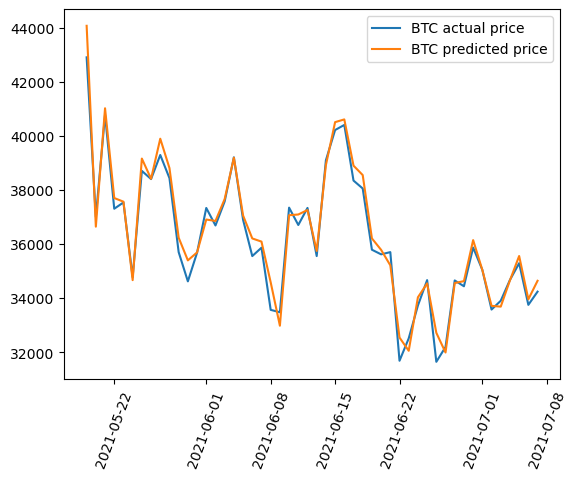

In [30]:
Bitcoin_data = pd.read_csv('resources/coin_Bitcoin.csv',index_col = ['Date'], parse_dates=True)
X = Bitcoin_data.drop('Close', axis=1).drop(['SNo', 'Name', 'Symbol'], axis=1)
Y = Bitcoin_data['Close']
Btc_model = LinearRegression().fit(X[['High', 'Low', 'Open', 'Marketcap']], Y)
y_predict = Btc_model.predict(X[['High', 'Low', 'Open', 'Marketcap']])

Bitcoin_data['Prediction'] = y_predict

sensibility = 50
data = Bitcoin_data.tail(sensibility)
plt.plot(data.index, data['Close'], label='BTC actual price')
plt.plot(data.index, data['Prediction'], label='BTC predicted price')
plt.xticks(rotation=70)
plt.legend()
plt.show()

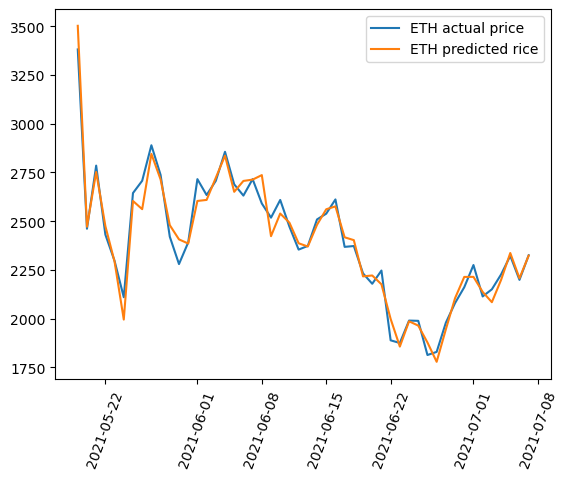

In [28]:
Eth_data = pd.read_csv('resources/coin_Ethereum.csv',index_col = ['Date'], parse_dates=True)
X = Eth_data.drop('Close', axis=1).drop(['SNo', 'Name', 'Symbol'], axis=1)
Y = Eth_data['Close']
Eth_model = LinearRegression().fit(X[['High', 'Low', 'Open']], Y)
y_predict = Eth_model.predict(X[['High', 'Low', 'Open']])

Eth_data['Prediction'] = y_predict

sensibility = 50
data = Eth_data.tail(sensibility)
plt.plot(data.index, data['Close'], label='ETH actual price')
plt.plot(data.index, data['Prediction'], label='ETH predicted rice')
plt.xticks(rotation=70)
plt.legend()
plt.show()

**Conclusion**: Here, we are plotting the last 50 data points (The number can be changed by tuning the sensibility variable). We can see that the model has done pretty well for both BTC and ETH predictions.<br>
**Note**: The predictors for ETH are based on the features Selection previously done. For the NFT features, see nft.ipnyb

## Correlation between cryptocurrencies: Bitcoin & Litecoin

In [12]:
LTC = pd.read_csv('resources/coin_Litecoin.csv').drop('SNo', axis=1)
BTC = pd.read_csv('resources/coin_Bitcoin.csv').drop('SNo', axis=1)

In [34]:
LTC = LTC.set_axis(['Name', 'Symbol', 'DATE', 'High_LTC', 'Low_LTC', 'Open_LTC', 'Close_LTC', 'Volume_LTC', 'Marketcap_LTC'], axis=1, inplace=False)

In [36]:
LTC_BTC = pd.concat([LTC, BTC], axis=1).drop('Date', axis=1)

In [37]:
LTC_BTC

Name Symbol                 DATE    High_LTC     Low_LTC  \
0     Litecoin    LTC  2013-04-29 23:59:59    4.573600    4.225640   
1     Litecoin    LTC  2013-04-30 23:59:59    4.572380    4.168960   
2     Litecoin    LTC  2013-05-01 23:59:59    4.356860    3.520290   
3     Litecoin    LTC  2013-05-02 23:59:59    4.039300    3.007170   
4     Litecoin    LTC  2013-05-03 23:59:59    3.453610    2.395940   
...        ...    ...                  ...         ...         ...   
2986  Litecoin    LTC  2021-07-02 23:59:59  138.787700  130.935471   
2987  Litecoin    LTC  2021-07-03 23:59:59  141.356011  134.945288   
2988  Litecoin    LTC  2021-07-04 23:59:59  147.836059  137.096427   
2989  Litecoin    LTC  2021-07-05 23:59:59  144.849333  134.960263   
2990  Litecoin    LTC  2021-07-06 23:59:59  142.703568  135.924837   

        Open_LTC   Close_LTC    Volume_LTC  Marketcap_LTC     Name Symbol  \
0       4.366760    4.383900  0.000000e+00   7.538896e+07  Bitcoin    BTC   
1       4.403520    4.296490  0.000000e+00   7.402092e+07  Bitcoin    BTC   
2       4.289540    3.801010  0.000000e+00   6.560460e+07  Bitcoin    BTC   
3       3.780020    3.371980  0.000000e+00   5.828798e+07  Bitcoin    BTC   
4       3.390440    3.044910  0.000000e+00   5.269485e+07  Bitcoin    BTC   
...          ...         ...           ...            ...      ...    ...   
2986  137.299274  136.943696  1.418981e+09   9.141322e+09  Bitcoin    BTC   
2987  136.930584  140.279688  1.236494e+09   9.364008e+09  Bitcoin    BTC   
2988  140.317998  144.905849  1.431657e+09   9.672815e+09  Bitcoin    BTC   
2989  144.849333  138.073246  1.338246e+09   9.216723e+09  Bitcoin    BTC   
2990  137.951668  138.985636  1.504907e+09   9.277627e+09  Bitcoin    BTC   

              High           Low          Open         Close        Volume  \
0       147.488007    134.000000    134.444000    144.539993  0.000000e+00   
1       146.929993    134.050003    144.000000    139.000000  0.000000e+00   
2       139.889999    107.720001    139.000000    116.989998  0.000000e+00   
3       125.599998     92.281898    116.379997    105.209999  0.000000e+00   
4       108.127998     79.099998    106.250000     97.750000  0.000000e+00   
...            ...           ...           ...           ...           ...   
2986  33939.588699  32770.680780  33549.600177  33897.048590  3.872897e+10   
2987  34909.259899  33402.696536  33854.421362  34668.548402  2.438396e+10   
2988  35937.567147  34396.477458  34665.564866  35287.779766  2.492431e+10   
2989  35284.344430  33213.661034  35284.344430  33746.002456  2.672155e+10   
2990  35038.536363  33599.916169  33723.509655  34235.193451  2.650126e+10   

         Marketcap  
0     1.603769e+09  
1     1.542813e+09  
2     1.298955e+09  
3     1.168517e+09  
4     1.085995e+09  
...            ...  
2986  6.354508e+11  
2987  6.499397e+11  
2988  6.615748e+11  
2989  6.326962e+11  
2990  6.418992e+11  

[2991 rows x 17 columns]

In [42]:
LTC_BTC.corr().style.background_gradient(cmap='gist_heat', axis=0)

In [44]:
X = LTC_BTC.drop('Close', axis=1).drop(['DATE', 'Name', 'Symbol'], axis=1)
Y = LTC_BTC['Close']

print('Backward:', validate_best_model(get_all_models(X, Y, n_iteration=len(X.columns), algorithm='backward', features=list(X.columns)), LTC_BTC, 'Close'))
print('Forward:', validate_best_model(get_all_models(X, Y, n_iteration=len(X.columns)), LTC_BTC, 'Close'))

Backward: (55258743.70502815, 0.9181782279857733, (LinearRegression(), 55258743.70502815, ['Close_LTC', 'Marketcap']))
Forward: (55258743.70502803, 0.9181782279857801, (LinearRegression(), 55258743.70502803, ['Marketcap', 'Close_LTC']))


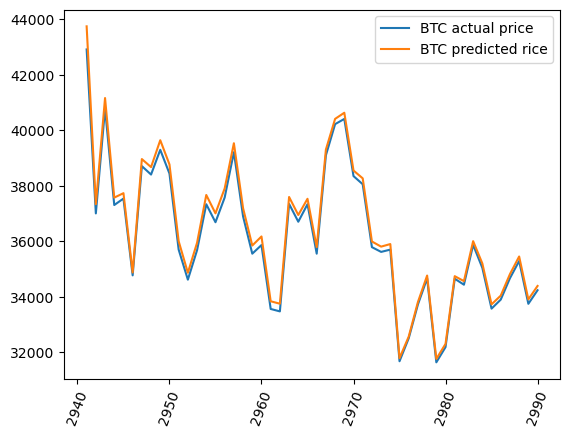

In [46]:
X = LTC_BTC.drop('Close', axis=1).drop(['Name', 'Symbol'], axis=1)
Y = LTC_BTC['Close']
LTC_BTC_model = LinearRegression().fit(X[['Close_LTC', 'Marketcap']], Y)
y_predict = LTC_BTC_model.predict(X[['Close_LTC', 'Marketcap']])

LTC_BTC['Prediction'] = y_predict

sensibility = 50
data = LTC_BTC.tail(sensibility)
plt.plot(data.index, data['Close'], label='BTC actual price')
plt.plot(data.index, data['Prediction'], label='BTC predicted rice')
plt.xticks(rotation=70)
plt.legend()
plt.show()

***Conclusion***: We can see that there is in fact a correlation between Bitcoin and Litecoin. The prediction of BTC using the close price of LTC is also somewhat accurate.

## Correlation between cryptocurrencies: Bitcoin & Ethereum

In [47]:
ETH = pd.read_csv('resources/coin_Ethereum.csv').drop('SNo', axis=1)
BTC = pd.read_csv('resources/coin_Bitcoin.csv').drop('SNo', axis=1)
ETH = LTC.set_axis(['Name', 'Symbol', 'DATE', 'High_ETH', 'Low_ETH', 'Open_ETH', 'Close_ETH', 'Volume_ETH', 'Marketcap_ETH'], axis=1, inplace=False)
ETH_BTC = pd.concat([ETH, BTC], axis=1).drop('Date', axis=1)

ETH_BTC

Name Symbol                 DATE    High_ETH     Low_ETH  \
0     Litecoin    LTC  2013-04-29 23:59:59    4.573600    4.225640   
1     Litecoin    LTC  2013-04-30 23:59:59    4.572380    4.168960   
2     Litecoin    LTC  2013-05-01 23:59:59    4.356860    3.520290   
3     Litecoin    LTC  2013-05-02 23:59:59    4.039300    3.007170   
4     Litecoin    LTC  2013-05-03 23:59:59    3.453610    2.395940   
...        ...    ...                  ...         ...         ...   
2986  Litecoin    LTC  2021-07-02 23:59:59  138.787700  130.935471   
2987  Litecoin    LTC  2021-07-03 23:59:59  141.356011  134.945288   
2988  Litecoin    LTC  2021-07-04 23:59:59  147.836059  137.096427   
2989  Litecoin    LTC  2021-07-05 23:59:59  144.849333  134.960263   
2990  Litecoin    LTC  2021-07-06 23:59:59  142.703568  135.924837   

        Open_ETH   Close_ETH    Volume_ETH  Marketcap_ETH     Name Symbol  \
0       4.366760    4.383900  0.000000e+00   7.538896e+07  Bitcoin    BTC   
1       4.403520    4.296490  0.000000e+00   7.402092e+07  Bitcoin    BTC   
2       4.289540    3.801010  0.000000e+00   6.560460e+07  Bitcoin    BTC   
3       3.780020    3.371980  0.000000e+00   5.828798e+07  Bitcoin    BTC   
4       3.390440    3.044910  0.000000e+00   5.269485e+07  Bitcoin    BTC   
...          ...         ...           ...            ...      ...    ...   
2986  137.299274  136.943696  1.418981e+09   9.141322e+09  Bitcoin    BTC   
2987  136.930584  140.279688  1.236494e+09   9.364008e+09  Bitcoin    BTC   
2988  140.317998  144.905849  1.431657e+09   9.672815e+09  Bitcoin    BTC   
2989  144.849333  138.073246  1.338246e+09   9.216723e+09  Bitcoin    BTC   
2990  137.951668  138.985636  1.504907e+09   9.277627e+09  Bitcoin    BTC   

              High           Low          Open         Close        Volume  \
0       147.488007    134.000000    134.444000    144.539993  0.000000e+00   
1       146.929993    134.050003    144.000000    139.000000  0.000000e+00   
2       139.889999    107.720001    139.000000    116.989998  0.000000e+00   
3       125.599998     92.281898    116.379997    105.209999  0.000000e+00   
4       108.127998     79.099998    106.250000     97.750000  0.000000e+00   
...            ...           ...           ...           ...           ...   
2986  33939.588699  32770.680780  33549.600177  33897.048590  3.872897e+10   
2987  34909.259899  33402.696536  33854.421362  34668.548402  2.438396e+10   
2988  35937.567147  34396.477458  34665.564866  35287.779766  2.492431e+10   
2989  35284.344430  33213.661034  35284.344430  33746.002456  2.672155e+10   
2990  35038.536363  33599.916169  33723.509655  34235.193451  2.650126e+10   

         Marketcap  
0     1.603769e+09  
1     1.542813e+09  
2     1.298955e+09  
3     1.168517e+09  
4     1.085995e+09  
...            ...  
2986  6.354508e+11  
2987  6.499397e+11  
2988  6.615748e+11  
2989  6.326962e+11  
2990  6.418992e+11  

[2991 rows x 17 columns]

In [48]:
ETH_BTC.corr().style.background_gradient(cmap='gist_heat', axis=0)

In [49]:
X = ETH_BTC.drop('Close', axis=1).drop(['DATE', 'Name', 'Symbol'], axis=1)
Y = ETH_BTC['Close']

print('Backward:', validate_best_model(get_all_models(X, Y, n_iteration=len(X.columns), algorithm='backward', features=list(X.columns)), ETH_BTC, 'Close'))
print('Forward:', validate_best_model(get_all_models(X, Y, n_iteration=len(X.columns)), ETH_BTC, 'Close'))

Backward: (55258743.70502815, 0.9181782279857733, (LinearRegression(), 55258743.70502815, ['Close_ETH', 'Marketcap']))
Forward: (55258743.70502803, 0.9181782279857801, (LinearRegression(), 55258743.70502803, ['Marketcap', 'Close_ETH']))


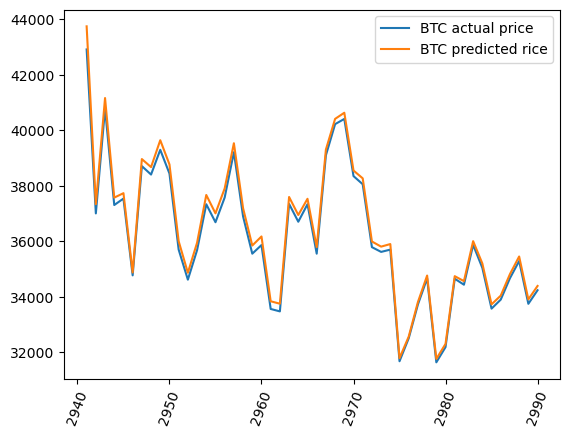

In [50]:
X = ETH_BTC.drop('Close', axis=1).drop(['Name', 'Symbol'], axis=1)
Y = ETH_BTC['Close']
ETH_BTC_model = LinearRegression().fit(X[['Close_ETH', 'Marketcap']], Y)
y_predict = ETH_BTC_model.predict(X[['Close_ETH', 'Marketcap']])

ETH_BTC['Prediction'] = y_predict

sensibility = 50
data = ETH_BTC.tail(sensibility)
plt.plot(data.index, data['Close'], label='BTC actual price')
plt.plot(data.index, data['Prediction'], label='BTC predicted rice')
plt.xticks(rotation=70)
plt.legend()
plt.show()

***Conclusion***: Results are smilar to the previous section